# 1. Install Necessary Libraries

In [8]:
import tensorflow as tf
import os

In [9]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [10]:
gpus

[]

# 2. Remove dodgy images

In [11]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [12]:
data_dir= 'data'

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
image_exts[0]

'jpeg'

In [15]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [16]:
img =cv2.imread(os.path.join('data', 'happy','154006829.jpg'))

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Loading the Data

In [18]:
import numpy as np

In [19]:
tf.data.Dataset??

In [20]:
data =tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator() #access fata piplines

In [22]:
batch = data_iterator.next() #get consecutive batches

In [23]:
batch[0].shape

(32, 256, 256, 3)

In [24]:
#Class 0 = Sad people
#Class 1 = happy people
batch[1]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

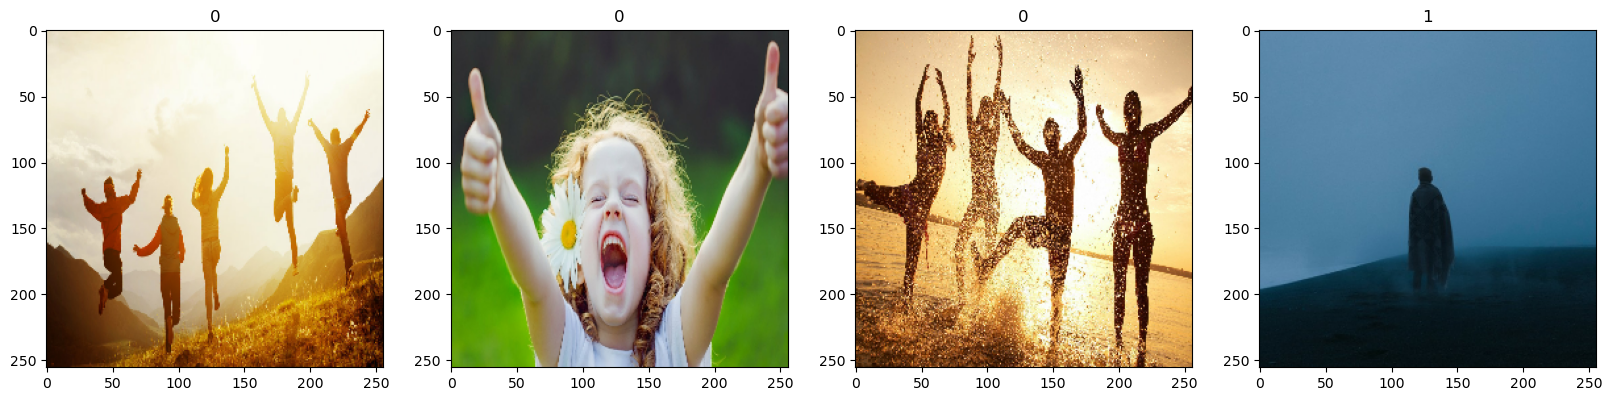

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scaling the Data

In [26]:
scaled = batch[0]/255

In [27]:
scaled.max()

1.0

In [28]:
data = data.map(lambda x,y: (x/255, y)) #map allows transformation of data in preprocessing pipeline
# x represents images
# y represents labels
 # x/255 is rescaling
    

In [29]:
data.as_numpy_iterator().next()

(array([[[[0.02331495, 0.01939338, 0.00370711],
          [0.04571078, 0.03002451, 0.0182598 ],
          [0.05892549, 0.04716079, 0.02755295],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04283711, 0.05852338, 0.07028808],
          [0.03529412, 0.05251225, 0.06427696]],
 
         [[0.05690583, 0.04121955, 0.02945485],
          [0.05223652, 0.03655025, 0.02478554],
          [0.05900735, 0.04724265, 0.0276348 ],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04683239, 0.06251867, 0.07428338],
          [0.03534917, 0.05256731, 0.06433202]],
 
         [[0.0836397 , 0.06403186, 0.05226716],
          [0.04712058, 0.0314343 , 0.0196696 ],
          [0.04808948, 0.04416791, 0.02456007],
          ...,
          [0.04024634, 0.06377576, 0.06377576],
          [0.04705882, 0.0627451 , 0.07450981],
          [0.03953211, 0.05675025, 0.06851496]],
 
         ...,
 
         [[0.04947917, 0.0573223 , 0.03771446],
          [0.04963

In [30]:
len(data)

6

# 5. Splitting the Data

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [32]:
train_size

4

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
#take defines how much data we are going to take in the partition
# skip is used to skip batches

In [34]:
len(train)

4

# 6. Creating Neural network

In [35]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [37]:
model = Sequential()

In [38]:
# 16 filters (3x3 pixels inside) 1 pixel at a time
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flattening data
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# accuracy tells how well model is classifying either as 0 or 1

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 13s 2s/step - loss: 1.1524 - accuracy: 0.5078 - val_loss: 0.6585 - val_accuracy: 0.8125
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.6462 - accuracy: 0.6562 - val_loss: 0.5499 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6022 - accuracy: 0.6094 - val_loss: 0.6294 - val_accuracy: 0.5312
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.5606 - accuracy: 0.6016 - val_loss: 0.5159 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5732 - accuracy: 0.7188 - val_loss: 0.4860 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.5251 - accuracy: 0.6875 - val_loss: 0.4978 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.4691 - accuracy: 0.8281 - val_loss: 0.5016 - val_accuracy: 0.7500
Epoch 8/20
4/4 [=======================

In [44]:
hist.history

{'loss': [1.1524310111999512,
  0.646162748336792,
  0.602238655090332,
  0.5606434941291809,
  0.5731550455093384,
  0.5250526070594788,
  0.4690864086151123,
  0.42941397428512573,
  0.36886489391326904,
  0.3610709011554718,
  0.310275137424469,
  0.274478554725647,
  0.20888926088809967,
  0.20938676595687866,
  0.15966983139514923,
  0.15250900387763977,
  0.0896415114402771,
  0.047893621027469635,
  0.042767688632011414,
  0.028497720137238503],
 'accuracy': [0.5078125,
  0.65625,
  0.609375,
  0.6015625,
  0.71875,
  0.6875,
  0.828125,
  0.75,
  0.8515625,
  0.8515625,
  0.8828125,
  0.8828125,
  0.9609375,
  0.9453125,
  0.9609375,
  0.96875,
  0.9765625,
  1.0,
  0.9921875,
  0.9921875],
 'val_loss': [0.6584910154342651,
  0.5499313473701477,
  0.6294143199920654,
  0.5159342288970947,
  0.48600924015045166,
  0.49778079986572266,
  0.5016301870346069,
  0.41316962242126465,
  0.3012636601924896,
  0.540219783782959,
  0.25977402925491333,
  0.18552406132221222,
  0.16182124

# 7. Plot Performance

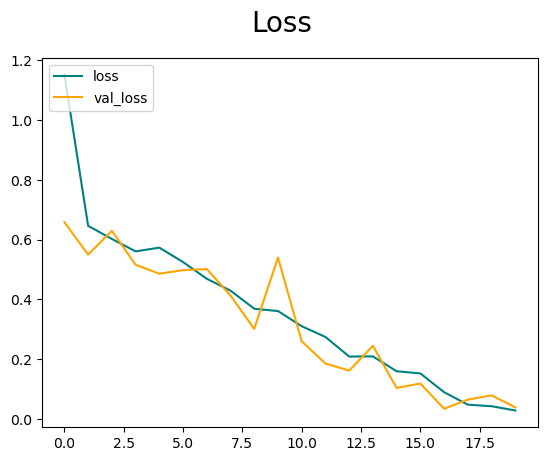

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss') #training loss
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') #validation loss
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

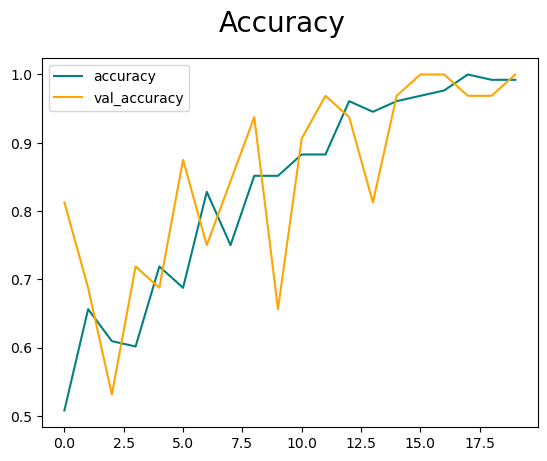

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy') #training accuracy
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')#validation accuracy
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
# measures used for classification problem

In [48]:
#establish instances of each library
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X) #makes prediction
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [50]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 8. Testing the Model

In [51]:
import cv2

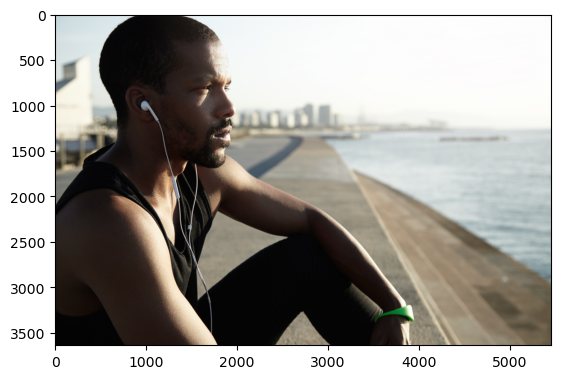

In [52]:
img = cv2.imread('image-20160914-4963-19knfh1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

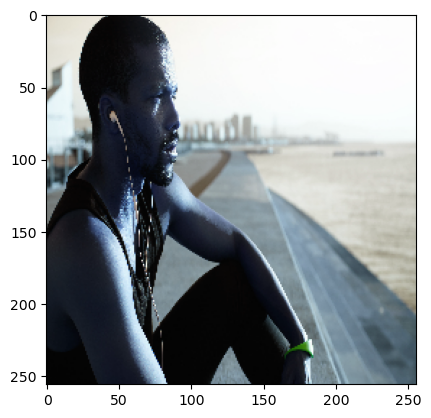

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [56]:
yhat

array([[0.9983312]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 9. Save the Model

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','imageclassifier.h5'))

In [62]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [63]:
new_model.predict(np.expand_dims(resize/255, 0)) 

1/1 [==============================] - 0s 106ms/step


array([[0.9983312]], dtype=float32)